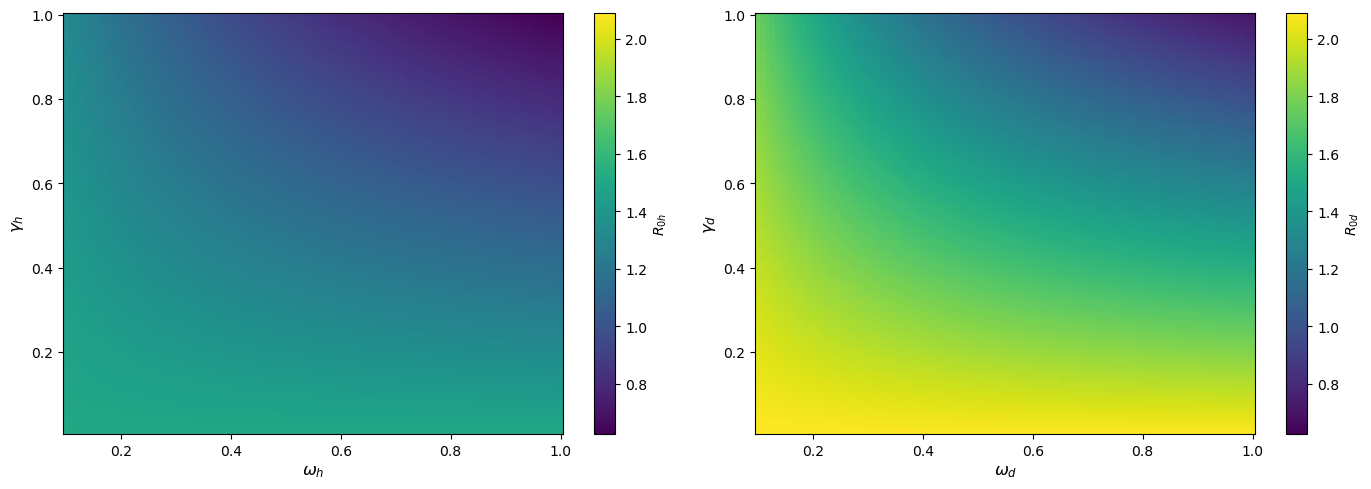

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# --- Compute R0_h ---
base_values_h = {
    'theta_h': 0.479, 'omega_h': 0.527, 'mu_h': 0.298,
    'alpha_h': 0.3, 'tau_h': 0.896, 'sigma_h': 0.0039,
    'delta_h': 0.0474, 'psi_h': 0.415, 'gamma_h': 0.54
}
N_h = 6200000000  # Total population
omega_h_vals = np.linspace(0.1, 1.0, 100)
gamma_h_vals = np.linspace(0.01, 1, 100)
omega_h_grid, gamma_h_grid = np.meshgrid(omega_h_vals, gamma_h_vals)
R0_h_grid = np.zeros_like(omega_h_grid)

for i in range(len(gamma_h_vals)):
    for j in range(len(omega_h_vals)):
        omega_h = omega_h_grid[i, j]
        gamma_h = gamma_h_grid[i, j]
        theta_h = base_values_h['theta_h']
        mu_h = base_values_h['mu_h']
        alpha_h = base_values_h['alpha_h']
        tau_h = base_values_h['tau_h']
        sigma_h = base_values_h['sigma_h']
        delta_h = base_values_h['delta_h']
        psi_h = base_values_h['psi_h']

        V_h = (omega_h * theta_h) / ((psi_h + mu_h) * (omega_h + mu_h) - omega_h * psi_h)
        S_h = (theta_h + psi_h * V_h) / (omega_h + mu_h)
        # Store the raw R0 value
        R0_h_grid[i, j] = 9e9*(alpha_h * tau_h) * (S_h - V_h * (gamma_h - 1)) / (N_h * (mu_h + tau_h) * (delta_h + mu_h + sigma_h))

# --- Compute R0_d ---
base_values_d = {
    'theta_d': 0.1, 'omega_d': 0.5, 'mu_d': 0.0936,
    'alpha_d': 0.441, 'tau_d': 0.456, 'sigma_d': 0.0813,
    'c_E': 0.0416, 'c_I': 0.519, 'psi_d': 0.422, 'gamma_d': 0.605
}
N_d = 100000000000  # Total population
omega_d_vals = np.linspace(0.1, 1.0, 100)
gamma_d_vals = np.linspace(0.01, 1, 100)
omega_d_grid, gamma_d_grid = np.meshgrid(omega_d_vals, gamma_d_vals)
R0_d_grid = np.zeros_like(omega_d_grid)

for i in range(len(gamma_d_vals)):
    for j in range(len(omega_d_vals)):
        omega_d = omega_d_grid[i, j]
        gamma_d = gamma_d_grid[i, j]
        theta_d = base_values_d['theta_d']
        mu_d = base_values_d['mu_d']
        alpha_d = base_values_d['alpha_d']
        tau_d = base_values_d['tau_d']
        sigma_d = base_values_d['sigma_d']
        c_E = base_values_d['c_E']
        c_I = base_values_d['c_I']
        psi_d = base_values_d['psi_d']

        V_d = (omega_d * theta_d) / ((psi_d + mu_d) * (omega_d + mu_d) - omega_d * psi_d)
        S_d = (theta_d + psi_d * V_d) / (omega_d + mu_d)
        # Store the raw R0 value
        R0_d_grid[i, j] = 4e11*(alpha_d * tau_d) * (S_d - V_d * (gamma_d - 1)) / (N_d * (c_E + mu_d + tau_d) * (c_I + sigma_d + mu_d))

# --- THE CRITICAL STEP: Find Global Min and Max for the Color Scale ---
global_min = min(np.min(R0_h_grid), np.min(R0_d_grid))
global_max = max(np.max(R0_h_grid), np.max(R0_d_grid))
#print(f"Global min for color scale: {global_min}")
#print(f"Global max for color scale: {global_max}")

# --- Create the Figure with Two Subplots on the SAME SCALE ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot the first heatmap (R0_h)
# Use vmin and vmax to force the same color scale
im1 = ax1.pcolormesh(omega_h_grid, gamma_h_grid, R0_h_grid, 
                    shading='auto', cmap='viridis',
                    vmin=global_min, vmax=global_max) # <- This is the key!
cbar1 = fig.colorbar(im1, ax=ax1)
cbar1.set_label('$R_{0h}$')
ax1.set_xlabel(r'$\omega_h$', fontsize=12)
ax1.set_ylabel(r'$\gamma_h$', fontsize=12)
#ax1.set_title('Human Reproduciton Number ($R_{0h}$)')

# Plot the second heatmap (R0_d)
# Use the SAME vmin and vmax
im2 = ax2.pcolormesh(omega_d_grid, gamma_d_grid, R0_d_grid,
                    shading='auto', cmap='viridis',
                    vmin=global_min, vmax=global_max) # <- This is the key!
cbar2 = fig.colorbar(im2, ax=ax2)
cbar2.set_label('$R_{0d}$')
ax2.set_xlabel(r'$\omega_d$', fontsize=12)
ax2.set_ylabel(r'$\gamma_d$', fontsize=12)
#ax2.set_title('Reproduciton Number ($R_{0d}$)')

plt.tight_layout()
#plt.savefig('Combined_Heatmaps_Same_Scale.png', dpi=300, bbox_inches='tight')
plt.show()

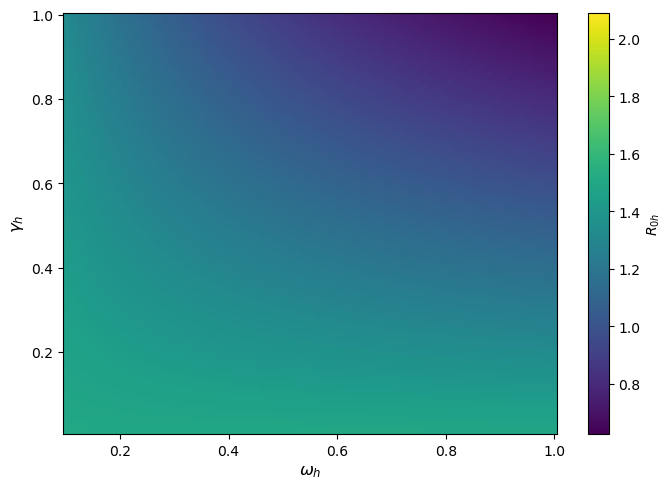

In [2]:
# --- Plot First Heatmap (R0_h) Separately ---
plt.figure(figsize=(7, 5))
im_h = plt.pcolormesh(omega_h_grid, gamma_h_grid, R0_h_grid, 
                     shading='auto', cmap='viridis',
                     vmin=global_min, vmax=global_max) # Use global scale
cbar_h = plt.colorbar(im_h)
cbar_h.set_label('$R_{0h}$')
plt.xlabel(r'$\omega_h$', fontsize=12)
plt.ylabel(r'$\gamma_h$', fontsize=12)
#plt.title('Human Reproduction Number ($R_{0h}$)')

plt.tight_layout()
#plt.savefig('New_Rh_heatmap_SameScale.png', dpi=300, bbox_inches='tight')
plt.show()

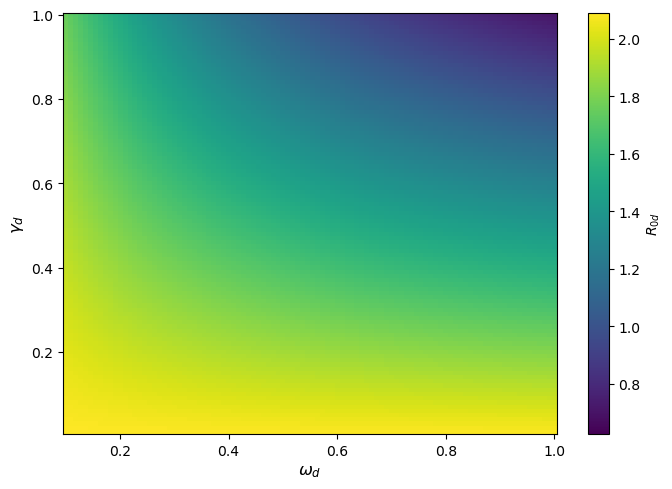

In [3]:
# --- Plot Second Heatmap (R0_d) Separately ---
plt.figure(figsize=(7, 5))
im_d = plt.pcolormesh(omega_d_grid, gamma_d_grid, R0_d_grid,
                     shading='auto', cmap='viridis',
                     vmin=global_min, vmax=global_max) # Use the SAME global scale
cbar_d = plt.colorbar(im_d)
cbar_d.set_label('$R_{0d}$')
plt.xlabel(r'$\omega_d$', fontsize=12)
plt.ylabel(r'$\gamma_d$', fontsize=12)
#plt.title('Mosquito Reproduction Number ($R_{0d}$)')

plt.tight_layout()
#plt.savefig('New_Rd_heatmap_SameScale.png', dpi=300, bbox_inches='tight')
plt.show()